In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import scipy.interpolate
import scipy.stats
import scipy.optimize
from datetime import datetime

import uproot

from ipywidgets import IntProgress
from IPython.display import display

import multigauss as mg
import pylandau

matplotlib.rcParams['figure.figsize'] = [12,8]
matplotlib.rcParams['axes.labelsize'] = 'x-large'


In [2]:
df = pd.read_pickle('/mnt/c/Users/oh6/Downloads/JANUS/bin/DataFiles/Run96_list.pkl')

(0.0, 1000.0)

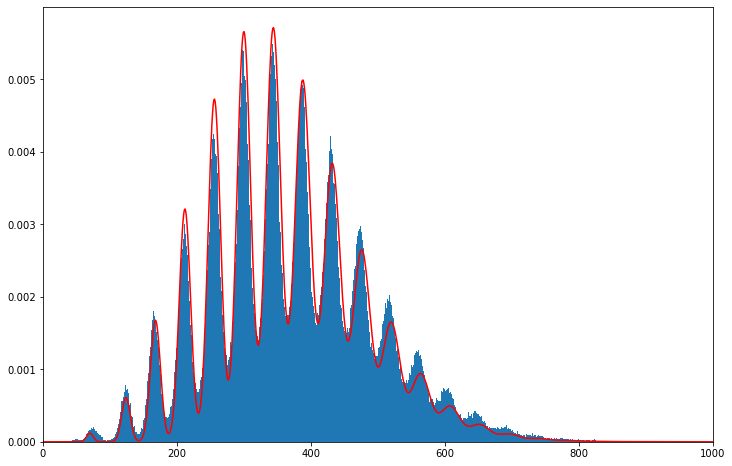

In [9]:
_ = plt.hist(df[df.channel == 32].HG, bins = 1000, range = (0, 1000), density = True)

xx = np.linspace(0,1000,1000)


plt.plot(xx, mg.sps_poisson(xx, ped=70, 44, 5, 4, 6.5, -10, True)[0], color = 'red')


plt.xlim(0, 1000)



[74.89220637 43.73597175  7.63940129  3.34367812  6.70539991 -5.2699311 ]
[[ 3.25864980e+00 -1.38766106e-04  3.66217960e-04 -1.65908306e-04
   8.88868129e-07  3.25772316e+00]
 [-1.38766106e-04  1.07357288e-03  1.11831304e-04  1.75078908e-05
  -4.28833412e-05  5.69094972e-03]
 [ 3.66217960e-04  1.11831304e-04  2.85161813e-02 -1.05596080e-02
  -5.98018886e-05 -6.23846278e-04]
 [-1.65908306e-04  1.75078908e-05 -1.05596080e-02  4.54486341e-03
   2.12172432e-05  5.57626242e-04]
 [ 8.88868130e-07 -4.28833412e-05 -5.98018886e-05  2.12172432e-05
   1.41282288e-04 -1.50625703e-04]
 [ 3.25772316e+00  5.69094972e-03 -6.23846278e-04  5.57626242e-04
  -1.50625703e-04  3.29371136e+00]]


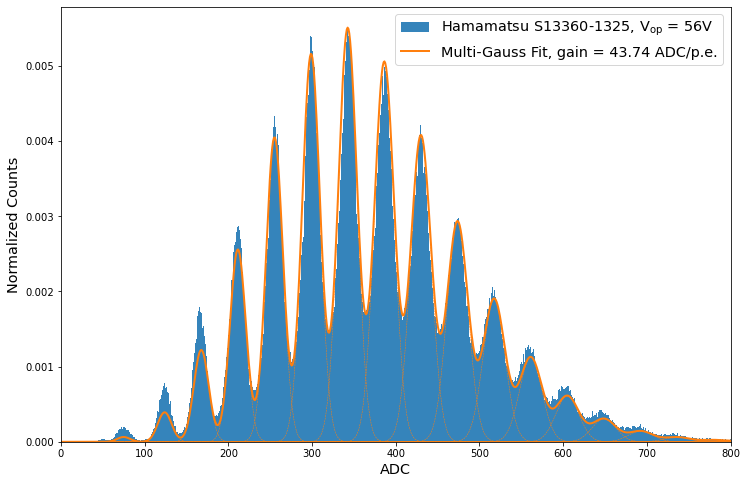

In [10]:
content, bins, _ = plt.hist(df[df.channel == 32].HG, bins = 1000, range = (0,1000), density  = True, label = 'Hamamatsu S13360-1325, V${}_\mathrm{op}$ = 56V', alpha = 0.9)
centers = (bins[:-1] + bins[1:])/2

r, c = scipy.optimize.curve_fit(mg.sps_poisson, centers, content, p0=(70, 44, 5, 4, 6.5, -10))

ped, gain, width_base, width_scale, poisson_k, ped_offset = r

#mask = (centers > ped + 1*gain) 
mask = (centers > 0) 

r, c = scipy.optimize.curve_fit(mg.sps_poisson, centers[mask], content[mask], p0=r, sigma = np.where(content[mask] > 0, np.sqrt(content[mask]), 1))

#r, cov = scipy.optimize.curve_fit(fitfunc, centers, content, p0 = [75, 42, 2.3])

multigauss, peaks =  mg.sps_poisson(centers, *r, output_single_peaks=True)

print(r)

ped, gain, width_base, width_scale, poisson_k, ped_offset = r


#plt.plot(centers, multigauss, color='C1')
for peak in peaks:
    plt.plot(centers, peak, '--', color = 'C1', lw = 0.5)
plt.plot(centers[mask], mg.sps_poisson(centers[mask], *r), lw = 2, label = f'Multi-Gauss Fit, gain = {gain:.2f} ADC/p.e.')


plt.ylabel('Normalized Counts')
plt.xlabel('ADC')

plt.legend(fontsize='x-large')

plt.xlim(0, 800)
#plt.yscale('log')
#plt.ylim(1e-5, 1e-2)


plt.savefig('sps_fit_fancy.pdf')

print(c)
